# ANOVA Testing - oneway

In [146]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import researchpy as rp
import matplotlib.pyplot as plt

,created_at,id,text,author_id,in_reply_to_user_id,lang,author,entities,referenced_tweets,media,geo,vader_sentiment_score,vader_sentiment_phrase,Twitter,Name,Link,State,Party,text_separated
0,2022-07-23 13:40:00+00:00,1550838139203096578,There are so-called leaders across this countr...,224285242,NaN,en,"{""entities"":{""url"":{""urls"":[{""start"":0,""end"":2...","{""urls"":[{""start"":263,""end"":286,""url"":""https:/...",NaN,"[{""media_key"":""13_1550833604804083712"",""type"":...",NaN,-0.6486,negative,senatorbennet,"Bennet, Michael F.",https://twitter.com/SenatorBennet,CO,Democrat,"There, are, so-called, leaders, across, this, ..."


/Users/martin/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/martin/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 45.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/martin/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


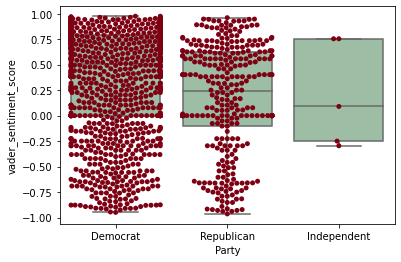

In [147]:
# load data file
df = pd.read_csv("results/tweets_senators_sentiment_merged_2022-07-28.csv")
display(df.head(1))

dem_sentiment = df.loc[df['Party'] == "Democrat"] 
rep_sentiment = df.loc[df['Party'] == "Republican"]  
ind_sentiment = df.loc[df['Party'] == "Independent"]  

dem_sentiment.sort_values(by=['created_at'], inplace=True, ascending=True)
rep_sentiment.sort_values(by=['created_at'], inplace=True, ascending=True)
ind_sentiment.sort_values(by=['created_at'], inplace=True, ascending=True)


# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Party', y='vader_sentiment_score', data=df, color='#99c2a2')
ax = sns.swarmplot(x="Party", y="vader_sentiment_score", data=df, color='#7d0013')
plt.show()

In [148]:
#descriptives

print("Descriptives of 'vader_sentiment_score' by Party")
display(rp.summary_cont(df['vader_sentiment_score'].groupby(df['Party'])))

print("Descriptives of 'vader_sentiment_score' by State")
display(rp.summary_cont(df['vader_sentiment_score'].groupby(df['State'])))


Descriptives of 'vader_sentiment_score' by Party




,N,Mean,SD,SE,95% Conf.,Interval
Party,,,,,,
Democrat,1008,0.3364,0.5350,0.0168,0.3033,0.3694
Independent,5,0.2103,0.5180,0.2317,-0.4329,0.8534
Republican,318,0.1661,0.5323,0.0298,0.1074,0.2248


Descriptives of 'vader_sentiment_score' by State




/Users/martin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/Users/martin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,N,Mean,SD,SE,95% Conf.,Interval
State,,,,,,
AK,6,0.8475,0.0622,0.0254,0.7822,0.9128
AL,6,0.4401,0.3279,0.1339,0.0960,0.7842
AR,4,-0.0596,0.8441,0.4221,-1.4028,1.2836
AZ,3,0.0550,0.3851,0.2223,-0.9017,1.0117
CA,63,0.4973,0.4559,0.0574,0.3825,0.6121
CO,62,0.5553,0.4134,0.0525,0.4503,0.6602
CT,45,-0.0110,0.5796,0.0864,-0.1851,0.1632
DE,16,0.4014,0.5900,0.1475,0.0870,0.7157
FL,20,0.2134,0.5498,0.1229,-0.0439,0.4707


In [149]:
#ANOVA - oneway

model = ols('vader_sentiment_score ~ Party', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Party,7.047877,2.0,12.345581,0.000005
Residual,379.066063,1328.0,NaN,NaN


In [150]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
Party,7.047877,2.0,3.523939,12.345581,0.000005,0.018253,0.016762
Residual,379.066063,1328.0,0.285441,NaN,NaN,NaN,NaN


## ASSUMPTION Check

* Normal Distribution - Shapiro - should be ns
* Homogeneity of variance - Levene - should be ns


In [151]:
#normal distribution - should be ns
stats.shapiro(model.resid)
#here it is not satisfied because it is sign

ShapiroResult(statistic=0.9130243062973022, pvalue=6.050627469105303e-27)

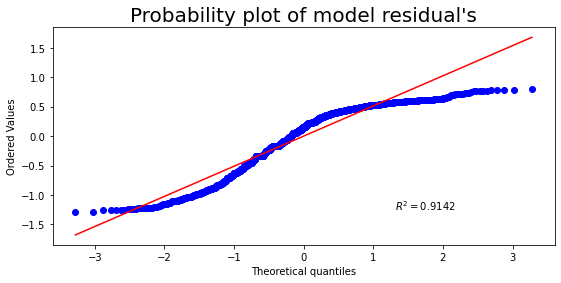

In [152]:
fig = plt.figure(figsize= (9, 4))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set
plt.show()

In [153]:
#Homogeneity of variance - should be ns
stats.levene(df['vader_sentiment_score'][df['Party'] == 'Democrat'],
             df['vader_sentiment_score'][df['Party'] == 'Republican'],
             df['vader_sentiment_score'][df['Party'] == 'Independent']
            )
#here assumption is satisfied

#Homogeneity of variances was asserted using Levene’s Test 
#which showed that equal variances could be assumed (p = .908).



LeveneResult(statistic=0.09652460662242292, pvalue=0.9079939244938646)

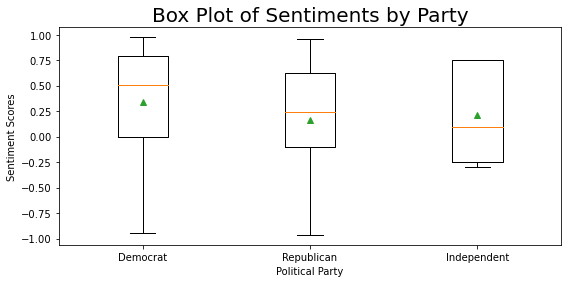

In [154]:
fig = plt.figure(figsize= (9, 4))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Sentiments by Party", fontsize= 20)
ax.set

data = [df['vader_sentiment_score'][df['Party'] == 'Democrat'],
        df['vader_sentiment_score'][df['Party'] == 'Republican'],
        df['vader_sentiment_score'][df['Party'] == 'Independent']]

ax.boxplot(data,
           labels= ['Democrat', 'Republican', 'Independent'],
           showmeans= True)

plt.xlabel("Political Party")
plt.ylabel("Sentiment Scores")

plt.show()

In [155]:
#posttest
#Tukey Honestly Significant Difference (HSD)

comp = mc.MultiComparison(df['vader_sentiment_score'], df['Party'])
post_hoc_res = comp.tukeyhsd()
display(post_hoc_res.summary())

#interpretation - diff between dem and re highly sign

display(rp.summary_cont(df['vader_sentiment_score'].groupby(df['Party'])))

group1,group2,meandiff,p-adj,lower,upper,reject
Democrat,Independent,-0.1261,0.8425,-0.6881,0.4359,False
Democrat,Republican,-0.1703,0.001,-0.2509,-0.0897,True
Independent,Republican,-0.0442,0.9,-0.6092,0.5208,False


,N,Mean,SD,SE,95% Conf.,Interval
Party,,,,,,
Democrat,1008,0.3364,0.5350,0.0168,0.3033,0.3694
Independent,5,0.2103,0.5180,0.2317,-0.4329,0.8534
Republican,318,0.1661,0.5323,0.0298,0.1074,0.2248
